In [37]:
# https://www.kaggle.com/code/ambarish/icassava-2019-data-analysis-dropout-params/notebook?scriptVersionId=13850110

In [38]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
print("now =", now)

# dd/mm/YY H:M:S
str_time = now.strftime("l%Hl%Ml%S")
print("date and time =", str_time)

now = 2022-11-22 22:35:45.570655
date and time = l22l35l45


In [39]:
import os

In [40]:
DATASET_PATH = r'./Data'

In [41]:
os.listdir(DATASET_PATH+r"/train")

['cbb', 'cbsd', 'cmd', 'healthy']

In [42]:
os.listdir(DATASET_PATH+r"/train/cbb")[:10]

['test-img-102.jpg',
 'test-img-114.jpg',
 'test-img-121.jpg',
 'test-img-123.jpg',
 'test-img-124.jpg',
 'test-img-1241.jpg',
 'test-img-1243.jpg',
 'test-img-1246.jpg',
 'test-img-1249.jpg',
 'test-img-1251.jpg']

In [43]:
os.listdir(DATASET_PATH+r"/test")[:10]

['cbb', 'cbsd', 'cmd', 'healthy']

In [44]:
import torch
torch.cuda.is_available = lambda : True
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [45]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import cnn_learner

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

from fastai.vision.all import *
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import fastbook
from fastbook import *
fastbook.setup_book()
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

from math import floor

In [46]:
train_path = DATASET_PATH+r"/train"
test_path = DATASET_PATH+r"/test"

In [47]:
def get_labels(file_path): 
    dir_name = os.path.dirname(file_path)
    split_dir_name = dir_name.split("/")
    dir_levels = len(split_dir_name)
    label  = split_dir_name[dir_levels - 1]
    return(label)

In [48]:
get_labels(DATASET_PATH+r"/train/cbb/train-cbb-528.jpg")

'cbb'

In [49]:
from glob import glob
imagePatches = glob(DATASET_PATH+r"/train/*/*.*", recursive=True)
imagePatches[0:10]

['./Data/dataset_fill/train\\cbb\\test-img-102.jpg',
 './Data/dataset_fill/train\\cbb\\test-img-114.jpg',
 './Data/dataset_fill/train\\cbb\\test-img-121.jpg',
 './Data/dataset_fill/train\\cbb\\test-img-123.jpg',
 './Data/dataset_fill/train\\cbb\\test-img-124.jpg',
 './Data/dataset_fill/train\\cbb\\test-img-1241.jpg',
 './Data/dataset_fill/train\\cbb\\test-img-1243.jpg',
 './Data/dataset_fill/train\\cbb\\test-img-1246.jpg',
 './Data/dataset_fill/train\\cbb\\test-img-1249.jpg',
 './Data/dataset_fill/train\\cbb\\test-img-1251.jpg']

In [50]:
fnames = get_image_files(train_path)
fnames



(#3424) [Path('Data/dataset_fill/train/cbb/test-img-102.jpg'),Path('Data/dataset_fill/train/cbb/test-img-114.jpg'),Path('Data/dataset_fill/train/cbb/test-img-121.jpg'),Path('Data/dataset_fill/train/cbb/test-img-123.jpg'),Path('Data/dataset_fill/train/cbb/test-img-124.jpg'),Path('Data/dataset_fill/train/cbb/test-img-1241.jpg'),Path('Data/dataset_fill/train/cbb/test-img-1243.jpg'),Path('Data/dataset_fill/train/cbb/test-img-1246.jpg'),Path('Data/dataset_fill/train/cbb/test-img-1249.jpg'),Path('Data/dataset_fill/train/cbb/test-img-1251.jpg')...]

In [51]:
print(str(fnames[0]))

pat = r"-([^/]+)-\d+.*$"
re.findall(pat, str(fnames[0]))

# /root/.fastai/data/oxford-iiit-pet/images/chihuahua_29.jpg

Data\dataset_fill\train\cbb\test-img-102.jpg


['img']

In [52]:
path = ''


img_size = 200
batch = 16
augmentations = [
#         Rotate(10, p=0.4, mode='bilinear'), 
        Brightness(max_lighting=0.3,p=0.5),
#         Contrast(max_lighting=0.4, p=0.5),
#         RandomErasing(p=0.3, sl=0.0, sh=0.2, min_aspect=0.3, max_count=1),
        Flip(p=0.5),
#         Zoom(max_zoom=1,p=0.5),
#         RandomResizedCrop(img_size)
        Normalize.from_stats(*imagenet_stats),
       
    ]

data = ImageDataLoaders.from_path_func(path, 
                                     fnames, 
                                     pat = pat,
                                     label_func=get_labels,  
                                     size=img_size, 
                                     bs=batch,
                                     num_workers=2,
                                     test = test_path,
                                     item_tfms=Resize(img_size),
                                     batch_tfms=augmentations
                                  )


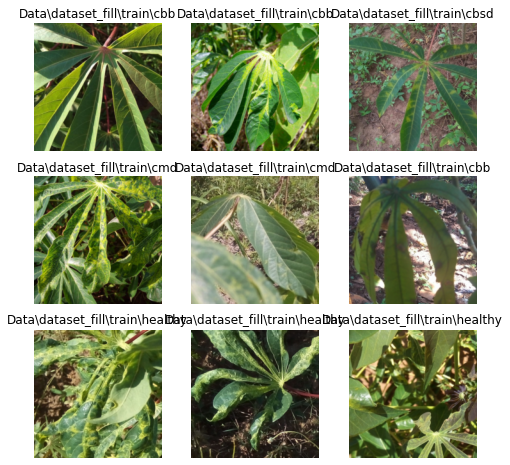

In [53]:
data.show_batch(nrows=3, figsize=(8,8))

In [54]:
learner= vision_learner(data, models.densenet121, metrics=[accuracy], ps = 0.25 ,model_dir=r'./fastAItmp/tmp/str_time')

SuggestedLRs(valley=0.0008317637839354575)

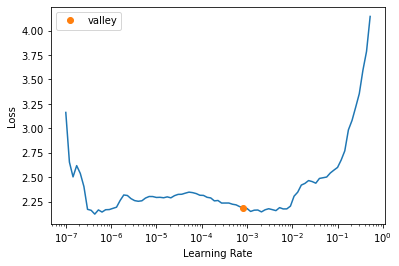

In [55]:
learner.lr_find()

In [56]:
lr=1e-2
learner.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.539875,1.279786,0.409357,01:14


In [57]:
learner.save('model-1')

Path('fastAItmp/tmp/str_time/model-1.pth')

In [58]:
learner.unfreeze()

SuggestedLRs(valley=0.0002754228771664202)

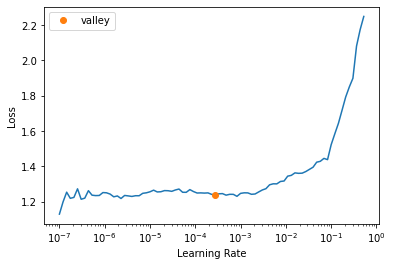

In [59]:
learner.lr_find()

In [60]:
learner.load('model-1')
learner.fit_one_cycle(40, slice(1e-2,1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,1.399981,1.555371,0.296784,01:14
1,1.681545,10.069735,0.340643,01:16
2,1.541556,30.604511,0.261696,01:16
3,1.396759,1.480497,0.304094,01:17
4,1.598181,3.676280,0.274854,01:26
5,1.894316,88.915039,0.242690,01:22
6,1.788407,8.337995,0.257310,01:18
7,1.921553,4.955627,0.254386,01:17
8,2.075781,5.896971,0.279240,01:19
9,2.257145,66764.015625,0.257310,01:19


In [33]:
learner.save(r'Model1')
learner.export(r'./fastSave/ModelFast'+str_time+'.h5')

In [34]:
learner.load('Model1')

In [ ]:
learner.show_results()

In [ ]:
learner.model[1]

In [ ]:
learner.summary()

In [ ]:
'''
performance display function 
copied from
https://forums.fast.ai/t/plotting-metrics-after-learning/69937/3
'''

from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *
    
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

In [ ]:
# Plotting matrics 
learner.recorder.plot_metrics()

In [36]:
print(learner.predict(r'D:\SeanTeam\Classification\Data\test\cbb/test-img-509.jpg'))

('Data\\train\\cbsd', TensorBase(1), TensorBase([0.0573, 0.7517, 0.1655, 0.0254]))


In [37]:
interp = ClassificationInterpretation.from_learner(learner)

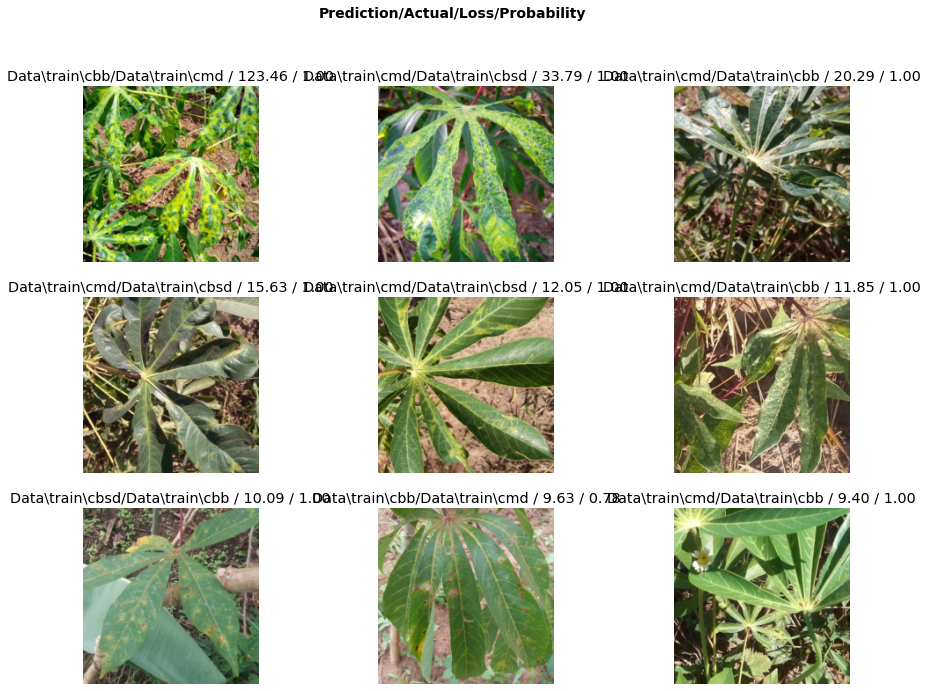

In [39]:
interp.plot_top_losses(9, figsize=(15,11))

In [40]:
interp.most_confused(min_val=2)

[('Data\\train\\cbb', 'Data\\train\\cbsd', 28),
 ('Data\\train\\cbsd', 'Data\\train\\cmd', 19),
 ('Data\\train\\cbsd', 'Data\\train\\cbb', 17),
 ('Data\\train\\cmd', 'Data\\train\\cbsd', 17),
 ('Data\\train\\cbsd', 'Data\\train\\healthy', 7),
 ('Data\\train\\healthy', 'Data\\train\\cmd', 6),
 ('Data\\train\\cbb', 'Data\\train\\cmd', 5),
 ('Data\\train\\healthy', 'Data\\train\\cbsd', 5),
 ('Data\\train\\cmd', 'Data\\train\\cbb', 4),
 ('Data\\train\\cmd', 'Data\\train\\healthy', 4),
 ('Data\\train\\cbb', 'Data\\train\\healthy', 3)]

In [41]:
preds,y = learner.predict(ds_type=DatasetType.Test)

NameError: name 'DatasetType' is not defined

In [ ]:
len(preds)

In [ ]:
len(os.listdir(test_path))

In [ ]:
SAMPLE_SUB = r'./input/sample_submission_file.csv'
sample_df = pd.read_csv(SAMPLE_SUB)

In [ ]:
sample_df.head()

In [ ]:
predictions = preds.numpy()

In [ ]:
class_preds = np.argmax(predictions, axis=1)

In [ ]:
for c, i in learner.data.train_ds.y.c2i.items():
    print(c,i)

In [ ]:
categories = ['cbb','cbsd','cgm','cmd','healthy']

def map_to_categories(predictions):
    return(categories[predictions])

categories_preds = list(map(map_to_categories,class_preds))

In [ ]:
filenames = list(map(os.path.basename,os.listdir(test_path)))

In [ ]:
df_sub = pd.DataFrame({'Category':categories_preds,'Id':filenames})

In [ ]:
df_sub.head()

In [ ]:
# Export to csv
df_sub.to_csv('submission_categories.csv', header=True, index=False)